# Proportion tests

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
%matplotlib inline

## Overview

1. Proportion from **one sample**: tests the mean of a single group against a known mean.
    - Proportions z-test
2. Proportions from **two independent samples**: compares the means for two groups.
    - Large samples: Z-test for proportions
    - Small samples: Fisher’s Exact Test
3. Proportions from **>2 independent samples**: compares the means of two or more groups.
    - Chi-square test
4. Proportions from **paired data**: compares means from the same group at different times (say, one year apart).
    - McNemar’s Test
    
For details on part of the above overview, check out [this doc](https://courses.washington.edu/dphs568/course/Categorical%20data%20handout.pdf).

## 1. One sample proportion test

### Proportions z-test

Python implementation: [`statsmodels.stats.proportion.proportions_ztest
`](https://www.statsmodels.org/dev/generated/statsmodels.stats.proportion.proportions_ztest.html). Can be used for both one-sample and two-sample tests.

Test whether a proportion is significantly different from a pre-set null hypothesis value:

H0: p1 = value

H1: p1 > value (one-sided)

OR

H1: p1 != value (two-sided).

In [3]:
from statsmodels.stats.proportion import proportions_ztest

In [4]:
count = 2
nobs = 20
value = 0  # test value

In [5]:
stat, pval = proportions_ztest(count, nobs, value)  # two-sided by default
print('{0:0.3f}'.format(pval))

0.136


In [6]:
stat, pval = proportions_ztest(count, nobs, value, 'larger')  # one-sided: prop > value
print('{0:0.3f}'.format(pval))

0.068


Of course the one-sided t-test has more power. But only use when you are really not sure that the effect cannot be in the other direction.

### Sample size determination

The minimum sample size required depends on a couple factors (from this [blog](https://towardsdatascience.com/how-to-use-python-to-figure-out-sample-sizes-for-your-study-871f0a76a19c) for a two-sample t-test):

- **The confidence level**: How confident do we need to be to ensure the results didn’t occur by chance? For a given difference in results, detecting it with higher confidence requires more sample. Typical choices here include 95% or 99% confidence, although these are just conventions.
- **The percentage difference that we want to be able to detect**: The smaller the differences you want to be able to detect, the more sample will be required.
- **The absolute values of the probabilities you want to detect differences on**: This is a little trickier and somewhat unique to the particular test we’re working with. It turns out that, for example, detecting a difference between 50% and 51% requires a different sample size than detecting a difference between 80% and 81%. 

So, to determine how many `n` we need for a significant result where `p-value < 0.05`, we need to set a percentage difference that we want to be able to detect. Let's define this as `p_difference`.

Know if we know against what `value` of null hypothesis we want to test, we can play around with the `n` to find the minimal number of observations for a significant result.

In [7]:
p_difference = .1
value = .0
n_top = 50

def get_ttest_pval(p_difference, n, value, **kwargs):
    n_success = (p_difference+value)*n
    _, pval = proportions_ztest(n_success, n, value, **kwargs)
    return pval

data_one_sided = [(n, get_ttest_pval(p_difference, n, value, alternative='larger'))  # set 'smaller' if p_diff < 0
                  for n in range (1, n_top, 1)]

data_two_sided = [(n, get_ttest_pval(p_difference, n, value)) 
                  for n in range (1, n_top, 1)]

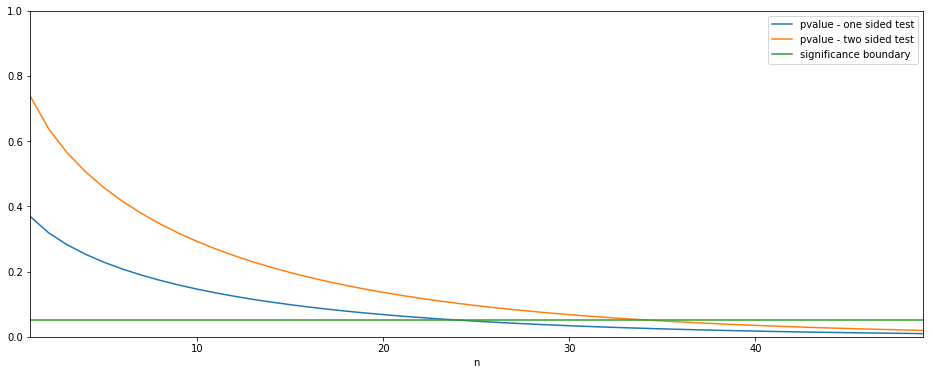

In [8]:
fig, ax = plt.subplots(1, 1, figsize=(16, 6))

pd.DataFrame(data_one_sided, columns=('n', 'pvalue - one sided test')).set_index('n').plot(ax=ax)
pd.DataFrame(data_two_sided, columns=('n', 'pvalue - two sided test')).set_index('n').plot(ax=ax)
ax.plot([0, n_top], [0.05, 0.05], label='significance boundary')
ax.legend()
_ = ax.set_ylim([0, 1])

The one-sided t-test has more power, and requires a smaller sample than the two-sided test.

## 2. Two sample proportion tests

Comparison of two proportions from two independent samples. These are called “two-sample” tests. Our goal is usually to estimate p1–p2, the  corresponding confidence intervals, and to perform hypothesis tests on:

H0: p1 – p2 = 0.

### Proportions z-test

Python implementation: [`statsmodels.stats.proportion.proportions_ztest
`](https://www.statsmodels.org/dev/generated/statsmodels.stats.proportion.proportions_ztest.html).

### Fisher's Exact test

TBD.

## 3. Proportions from >2 independent samples

### Chi-squared test

Chi-square test generalizes two-sample Z-test to situation with more than two proportions. The null hypothesis is that all proportions are equal:

H0: p1 = p2 = p3.

In the case of just two proportions the chi-squared test is equivalent to a z-test, with the additional disadvantage that it doesn't apply to one-sided alternative hypotheses as the direction of the effect is lost in squaring the z test statistic z^2 (see [this](http://www.talkstats.com/threads/z-test-for-proportions-vs-chi-square-what-is-the-difference.69634/) and [this](https://rinterested.github.io/statistics/chi_square_same_as_z_test.html) blog).

Python implementation:
[`statsmodels.stats.proportion.proportions_chisquare`](https://www.statsmodels.org/dev/generated/statsmodels.stats.proportion.proportions_chisquare.html).


## 4. Proportions from paired data

### McNemar’s Test

TBD.